In [1]:
%matplotlib inline

import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. Load MNIST data
  - 55,000/10,000/5,000 points for train/val/test
  - images: mnist.\*.images (\* $\in$ train, validation, test)
      - size: [1, 28*28]
  - labels: mnist.\*.labels (\* $\in$ train, validation, test)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### MNIST 데이터 확인

In [3]:
# print size of images and labels
print('image size: ', mnist.train.images.shape)
print('label size: ', mnist.train.labels.shape)

image size:  (55000, 784)
label size:  (55000, 10)


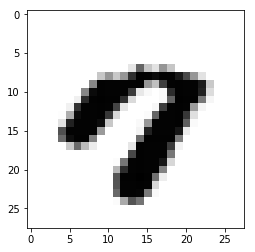

label: 7


In [4]:
idx = random.randint(0, mnist.train.images.shape[0])
img = mnist.train.images[idx, :]
label = mnist.train.labels[idx, :]
img = img.reshape(28,28)

plt.imshow(img, cmap=plt.cm.Greys)
plt.show()
print('label: {}'.format(np.argmax(label)))

### 2. Softmax Regressions
 - 약 92%의 성능이 나옴

In [3]:
# 인풋 데이터 및 레이블 정의
inps = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

In [4]:
# softmax regressor 모델 정의
W = tf.Variable(tf.zeros([784, 10])) # weight
b = tf.Variable(tf.zeros([10]))      # bias

pred = tf.nn.softmax( tf.matmul(inps, W) + b ) # softmax(W*x + b)

In [39]:
# loss 및 optimizer 정의
cross_entropy = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [40]:
# 정확도 정의
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [41]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(10):
        total_cost = 0

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train_step, cross_entropy], \
                                   feed_dict={inps: batch_xs, labels: batch_ys})
            total_cost += cost_val

        print( "Epoch:", "%04d" % (epoch + 1), \
            "Avg. cost =", '{:.3f}'.format(total_cost / total_batch))

    # 테스트 데이터에 대한 정확도
    print("Test Accuracy: ", sess.run(accuracy, \
                    feed_dict={inps: mnist.test.images, labels: mnist.test.labels}))

Epoch: 0001 Avg. cost = 0.676
Epoch: 0002 Avg. cost = 0.417
Epoch: 0003 Avg. cost = 0.375
Epoch: 0004 Avg. cost = 0.353
Epoch: 0005 Avg. cost = 0.340
Epoch: 0006 Avg. cost = 0.330
Epoch: 0007 Avg. cost = 0.323
Epoch: 0008 Avg. cost = 0.316
Epoch: 0009 Avg. cost = 0.312
Epoch: 0010 Avg. cost = 0.307
Test Accuracy:  0.9169
